In [1]:
# Reference : https://github.com/golbin/TensorFlow-Tutorials
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 파라미터 설정

In [22]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002

n_hidden = 256
n_input = 28*28
n_noise = 128 # 생성기 입력으로 사용할 노이즈의 크기

# 모델 구성

In [18]:
# GAN도 Unsupervised 학습이라서 Autoencoder처럼 Y를 사용하지 않음
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

# 생성기 신경망에 사용하는 변수
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기 신경망에 사용하는 변수
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

# 생성기(G) 신경망 구성
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2)+ G_b2)
    
    return output

# 판별기(D) 신경망 구성
def discriminator(inputs): 
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    
    return output

# 랜덤한 노이즈 Z를 만듬
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

# 노이즈를 이용해 랜덤한 이미지 생성함
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진짜 이미지인지 판별한 값을 구함
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구함 
D_real = discriminator(X)

## GAN 모델 최적화

논문에 따르면, GAN 모델의 최적화는 loss_G 와 loss_D 를 최대화 하는 것

그러나 loss_D가 증가하려면 loss_G는 하락해야하고, loss_G가 증가하려면 loss_D는 하락해야하는 경쟁관계에 있어서 loss_D와 loss_G는 서로 연관관계가 있기 때문에 두 개의 손실값이 항상 같이 증가하는 경향을 보이지는 않음 

In [19]:
# 진짜 이미지는 진짜라고 인식하고 생성기가 만들어낸 이미지가 가짜라고 판단하도록 판별기 신경망을 학습시킴
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1-D_gene))
# 생성된 가짜이미지가 진짜라고 인식될 수 있게 생성기 신경망을 학습시킴
loss_G = tf.reduce_mean(tf.log(D_gene))

loss_D를 구할 땐 판별기 신경망에서 사용되는 변수만 사용하고 

loss_G를 구할 때는 생성기 신경망에서 사용되는 변수만 사용하여 최적화해야함

In [20]:
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

# 신경망 모델 학습

Epoch : 0001 D loss:  -0.5629 G loss:  -1.9079


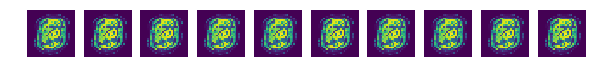

Epoch : 0002 D loss:  -0.2723 G loss:  -2.4947
Epoch : 0003 D loss:  -0.1465 G loss:  -2.9565
Epoch : 0004 D loss:  -0.5571 G loss:  -1.4747
Epoch : 0005 D loss:  -0.5404 G loss:  -1.6079
Epoch : 0006 D loss:  -0.3728 G loss:  -2.0689
Epoch : 0007 D loss:  -0.2661 G loss:  -2.6869
Epoch : 0008 D loss:  -0.3151 G loss:  -2.8542
Epoch : 0009 D loss:  -0.3668 G loss:  -2.1765
Epoch : 0010 D loss:  -0.3047 G loss:  -2.3845


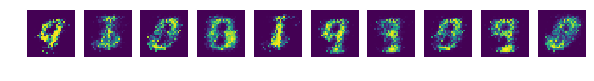

Epoch : 0011 D loss:  -0.3915 G loss:  -2.2001
Epoch : 0012 D loss:  -0.3565 G loss:  -2.3771
Epoch : 0013 D loss:  -0.4823 G loss:  -2.2566
Epoch : 0014 D loss:  -0.3339 G loss:  -2.5392
Epoch : 0015 D loss:  -0.4924 G loss:  -2.1341
Epoch : 0016 D loss:  -0.4882 G loss:  -2.1201
Epoch : 0017 D loss:  -0.4334 G loss:  -2.3086
Epoch : 0018 D loss:  -0.4561 G loss:  -2.2003
Epoch : 0019 D loss:  -0.4344 G loss:  -2.1983
Epoch : 0020 D loss:  -0.3692 G loss:  -2.5606


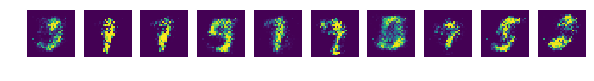

Epoch : 0021 D loss:  -0.4114 G loss:  -2.5773
Epoch : 0022 D loss:  -0.4526 G loss:  -2.4461
Epoch : 0023 D loss:  -0.5508 G loss:  -2.0129
Epoch : 0024 D loss:  -0.5534 G loss:  -2.0139
Epoch : 0025 D loss:  -0.6053 G loss:  -2.1973
Epoch : 0026 D loss:  -0.5908 G loss:  -1.9941
Epoch : 0027 D loss:  -0.5929 G loss:  -2.3410
Epoch : 0028 D loss:  -0.5581 G loss:  -2.0618
Epoch : 0029 D loss:  -0.4947 G loss:  -2.1873
Epoch : 0030 D loss:  -0.5539 G loss:  -2.1886


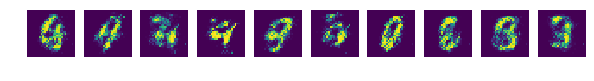

Epoch : 0031 D loss:  -0.7912 G loss:  -2.0622
Epoch : 0032 D loss:  -0.5789 G loss:  -2.1456
Epoch : 0033 D loss:  -0.5352 G loss:  -2.2200
Epoch : 0034 D loss:  -0.5459 G loss:  -2.5508
Epoch : 0035 D loss:  -0.6444 G loss:  -2.0924
Epoch : 0036 D loss:  -0.7258 G loss:  -1.8977
Epoch : 0037 D loss:  -0.7688 G loss:  -2.0316
Epoch : 0038 D loss:  -0.5405 G loss:  -1.9802
Epoch : 0039 D loss:  -0.6817 G loss:  -2.0470
Epoch : 0040 D loss:  -0.6455 G loss:  -2.0194


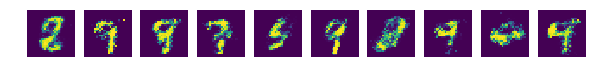

Epoch : 0041 D loss:  -0.7648 G loss:  -1.8573
Epoch : 0042 D loss:  -0.6423 G loss:  -2.0445
Epoch : 0043 D loss:  -0.9657 G loss:  -1.9664
Epoch : 0044 D loss:  -0.6872 G loss:  -2.2677
Epoch : 0045 D loss:  -0.8575 G loss:  -2.2345
Epoch : 0046 D loss:  -0.6780 G loss:  -2.1352
Epoch : 0047 D loss:  -0.9121 G loss:  -1.7590
Epoch : 0048 D loss:  -0.7772 G loss:  -1.9163
Epoch : 0049 D loss:  -0.8918 G loss:  -1.8872
Epoch : 0050 D loss:  -0.7615 G loss:  -1.8504


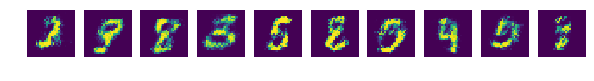

Epoch : 0051 D loss:  -0.8214 G loss:  -1.5305
Epoch : 0052 D loss:  -0.9239 G loss:  -1.7685
Epoch : 0053 D loss:  -0.7332 G loss:  -2.0757
Epoch : 0054 D loss:  -0.8567 G loss:  -1.7503
Epoch : 0055 D loss:  -0.9177 G loss:  -1.7268
Epoch : 0056 D loss:  -0.8845 G loss:  -1.6192
Epoch : 0057 D loss:  -0.8606 G loss:  -1.6786
Epoch : 0058 D loss:  -0.7373 G loss:  -1.8242
Epoch : 0059 D loss:  -0.8147 G loss:  -1.7907
Epoch : 0060 D loss:  -0.9937 G loss:  -1.5763


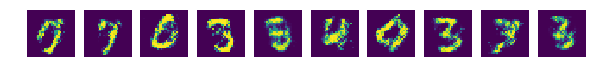

Epoch : 0061 D loss:  -0.8178 G loss:  -1.7176
Epoch : 0062 D loss:  -0.8666 G loss:  -1.5547
Epoch : 0063 D loss:  -0.9622 G loss:  -1.5774
Epoch : 0064 D loss:  -0.7853 G loss:  -1.5263
Epoch : 0065 D loss:  -0.8862 G loss:  -1.7466
Epoch : 0066 D loss:  -0.7965 G loss:  -1.7115
Epoch : 0067 D loss:  -0.9196 G loss:  -1.7283
Epoch : 0068 D loss:  -1.0207 G loss:  -1.6363
Epoch : 0069 D loss:  -0.9639 G loss:  -1.7057
Epoch : 0070 D loss:  -0.9690 G loss:  -1.4518


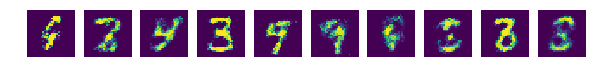

Epoch : 0071 D loss:  -0.8985 G loss:  -1.5649
Epoch : 0072 D loss:  -0.9938 G loss:  -1.4680
Epoch : 0073 D loss:  -0.9384 G loss:  -1.4854
Epoch : 0074 D loss:  -0.8571 G loss:  -1.5186
Epoch : 0075 D loss:  -1.0444 G loss:  -1.4629
Epoch : 0076 D loss:  -0.9418 G loss:  -1.5486
Epoch : 0077 D loss:  -1.0822 G loss:  -1.3407
Epoch : 0078 D loss:  -0.9750 G loss:  -1.4914
Epoch : 0079 D loss:  -0.8663 G loss:  -1.8674
Epoch : 0080 D loss:  -0.9079 G loss:  -1.5073


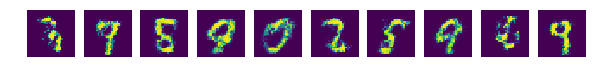

Epoch : 0081 D loss:  -0.9620 G loss:  -1.6659
Epoch : 0082 D loss:  -0.8854 G loss:  -1.5706
Epoch : 0083 D loss:  -0.9203 G loss:  -1.5638
Epoch : 0084 D loss:  -1.0458 G loss:  -1.3958
Epoch : 0085 D loss:  -1.0652 G loss:  -1.4597
Epoch : 0086 D loss:  -0.8623 G loss:  -1.7378
Epoch : 0087 D loss:  -1.0643 G loss:  -1.3058
Epoch : 0088 D loss:  -1.0084 G loss:  -1.3981
Epoch : 0089 D loss:  -0.9332 G loss:  -1.5718
Epoch : 0090 D loss:  -0.9783 G loss:  -1.4373


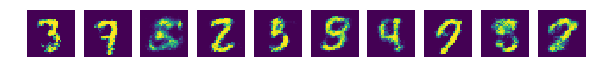

Epoch : 0091 D loss:  -0.9536 G loss:  -1.4527
Epoch : 0092 D loss:  -0.8703 G loss:  -1.4951
Epoch : 0093 D loss:  -1.0163 G loss:  -1.4632
Epoch : 0094 D loss:  -0.8151 G loss:  -1.5082
Epoch : 0095 D loss:  -0.9685 G loss:  -1.2650
Epoch : 0096 D loss:  -0.8733 G loss:  -1.5180
Epoch : 0097 D loss:  -0.8523 G loss:  -1.4748
Epoch : 0098 D loss:  -1.0788 G loss:  -1.3131
Epoch : 0099 D loss:  -0.8304 G loss:  -1.4728
Epoch : 0100 D loss:  -0.9152 G loss:  -1.6228


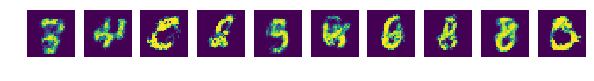

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})
    
    print('Epoch :', '%04d' % (epoch + 1), 
      'D loss: ', '{:.4f}'.format(loss_val_D),
      'G loss: ', '{:.4f}'.format(loss_val_G),
     )

    # 학습 과정 관찰
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        plt.show()